In [9]:
import mysql.connector
import pandas as pd
import researchpy as rp
import matplotlib.pyplot as plt

connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='root123!',
    database='commerce'
)

df_transactions = pd.read_sql('SELECT * FROM transactions;', connection)
# print(df_transactions.head(5))
# df_transactions.info()

/var/folders/v_/gk51vt417q9d6n5mw6_phw500000gn/T/ipykernel_38458/2225430200.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_transactions = pd.read_sql('SELECT * FROM transactions;', connection)


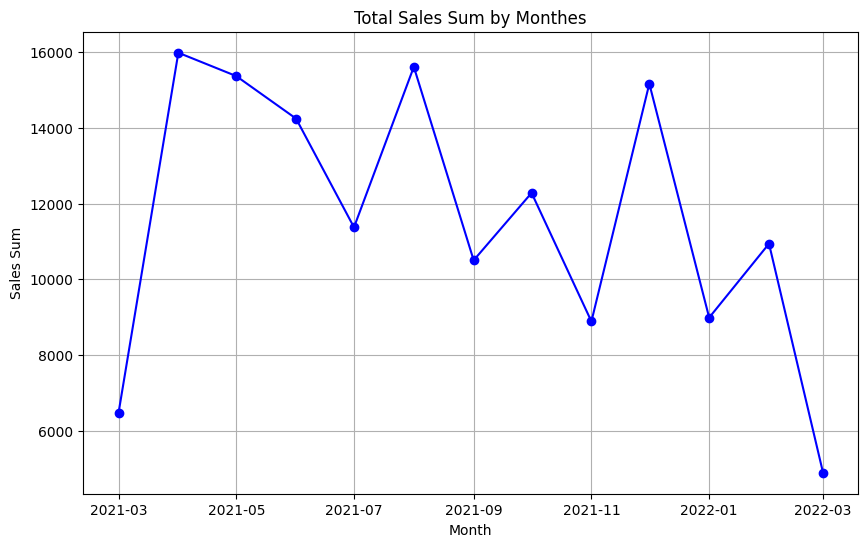

In [11]:
df_transactions['timestamp'] = pd.to_datetime(df_transactions['timestamp'])

monthly_data = df_transactions.groupby(df_transactions['timestamp'].dt.to_period('M'))['amount'].sum().reset_index()

monthly_data['timestamp'] = monthly_data['timestamp'].dt.to_timestamp()

plt.figure(figsize=(10, 6))
plt.plot(monthly_data['timestamp'], monthly_data['amount'], marker='o', linestyle='-', color='b')
plt.title('Total Sales Sum by Monthes')
plt.xlabel('Month')
plt.ylabel('Sales Sum')
plt.grid(True)
plt.show()